In [1]:
import pandas as pd

In [15]:
cnn_df = pd.read_csv("./results/cnn_2/predictions.csv")
linear_df = pd.read_csv("./results/ep_seq_linear_1/predictions.csv")

/tmp/ipykernel_2252586/3995387727.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  cnn_df = pd.read_csv("./results/cnn_2/predictions.csv")
/tmp/ipykernel_2252586/3995387727.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  linear_df = pd.read_csv("./results/ep_seq_linear_1/predictions.csv")


In [16]:
cnn_df.rename(columns={'CNN_Zeta': 'Predicted_Zeta', 'Expected_X_ji': 'X_ji'}, inplace=True)
linear_df.rename(columns={'CNN_Zeta': 'Predicted_Zeta', 'Expected_X_ji': 'X_ji'}, inplace=True)

In [17]:
print(cnn_df.head())

  Chr     Start  Strand           GeneId  X_ji       C_j    Rho_ji  \
0  20  50937116       0  ENSG00000000419   0.0  0.040232 -0.563513   
1  20  50937117       0  ENSG00000000419   0.0  0.040232 -0.556784   
2  20  50937118       0  ENSG00000000419   0.0  0.040232  1.162559   
3  20  50937119       0  ENSG00000000419   0.0  0.040232 -0.219913   
4  20  50937120       0  ENSG00000000419   0.0  0.040232  1.350467   

   Predicted_Zeta      Loss  GLM_Combined_Zeta  
0        0.569206  0.070681           0.339903  
1        0.573049  0.070206           0.630477  
2        3.198108  0.012580           1.147994  
3        0.802589  0.050127           0.364640  
4        3.859228  0.010425           1.151363  


In [18]:
print(linear_df.head())

  Chr     Start  Strand           GeneId  X_ji       C_j    Rho_ji  \
0  20  50937116       0  ENSG00000000419   0.0  0.040232 -1.277866   
1  20  50937117       0  ENSG00000000419   0.0  0.040232 -1.274789   
2  20  50937118       0  ENSG00000000419   0.0  0.040232  0.545625   
3  20  50937119       0  ENSG00000000419   0.0  0.040232 -1.268650   
4  20  50937120       0  ENSG00000000419   0.0  0.040232  0.551753   

   Predicted_Zeta      Loss  GLM_Combined_Zeta  
0        0.278631  0.144391           0.339903  
1        0.279490  0.143947           0.630477  
2        1.725687  0.023313           1.147994  
3        0.281211  0.143066           0.364640  
4        1.736294  0.023171           1.151363  


In [20]:
import numpy as np

# Loss calculation in-place
cnn_df["Loss_InPlace"] = cnn_df["X_ji"] * cnn_df["Rho_ji"] + cnn_df["C_j"] * np.exp(-cnn_df["Rho_ji"]) - cnn_df["X_ji"] * np.log(cnn_df["C_j"])
linear_df["Loss_InPlace"] = linear_df["X_ji"] * linear_df["Rho_ji"] + linear_df["C_j"] * np.exp(-linear_df["Rho_ji"]) - linear_df["X_ji"] * np.log(linear_df["C_j"])

In [21]:
print(cnn_df.head())
print(linear_df.head())

  Chr     Start  Strand           GeneId  X_ji       C_j    Rho_ji  \
0  20  50937116       0  ENSG00000000419   0.0  0.040232 -0.563513   
1  20  50937117       0  ENSG00000000419   0.0  0.040232 -0.556784   
2  20  50937118       0  ENSG00000000419   0.0  0.040232  1.162559   
3  20  50937119       0  ENSG00000000419   0.0  0.040232 -0.219913   
4  20  50937120       0  ENSG00000000419   0.0  0.040232  1.350467   

   Predicted_Zeta      Loss  GLM_Combined_Zeta  Loss_InPlace  
0        0.569206  0.070681           0.339903      0.070681  
1        0.573049  0.070206           0.630477      0.070206  
2        3.198108  0.012580           1.147994      0.012580  
3        0.802589  0.050127           0.364640      0.050127  
4        3.859228  0.010425           1.151363      0.010425  
  Chr     Start  Strand           GeneId  X_ji       C_j    Rho_ji  \
0  20  50937116       0  ENSG00000000419   0.0  0.040232 -1.277866   
1  20  50937117       0  ENSG00000000419   0.0  0.040232 -1.2

In [22]:
cnn_mean_loss_by_gene = cnn_df.groupby('GeneId')['Loss'].mean().reset_index()
linear_mean_loss_by_gene = linear_df.groupby('GeneId')['Loss'].mean().reset_index()

print(cnn_mean_loss_by_gene)
print(linear_mean_loss_by_gene)

              GeneId      Loss
0    ENSG00000000419  0.155744
1    ENSG00000004864  0.111242
2    ENSG00000005483  0.193246
3    ENSG00000006451  0.079547
4    ENSG00000006530  0.095069
..               ...       ...
314  ENSG00000221968  0.134818
315  ENSG00000247595  0.080896
316  ENSG00000273749  0.053679
317  ENSG00000275066  0.079749
318  ENSG00000276234  0.111004

[319 rows x 2 columns]
              GeneId      Loss
0    ENSG00000000419  0.163900
1    ENSG00000004864  0.117278
2    ENSG00000005483  0.204462
3    ENSG00000006451  0.082810
4    ENSG00000006530  0.099318
..               ...       ...
314  ENSG00000221968  0.139513
315  ENSG00000247595  0.084767
316  ENSG00000273749  0.055419
317  ENSG00000275066  0.083897
318  ENSG00000276234  0.116535

[319 rows x 2 columns]


In [23]:
difference = cnn_df['Predicted_Zeta'] - linear_df['Predicted_Zeta']
print(difference)

0            0.290575
1            0.293559
2            1.472421
3            0.521378
4            2.122934
              ...    
17113146    18.468413
17113147    15.543148
17113148    13.235483
17113149     9.053210
17113150     2.690669
Name: Predicted_Zeta, Length: 17113151, dtype: float64


In [24]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

def plot_data(net_data, linear_data):
    indices = range(len(net_data))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    ax.plot(indices, net_data, color='blue', label='Neural Net Zeta', alpha=0.5) #s=10
    ax.plot(indices, linear_data, color='orange', label='GLM Zeta', alpha=0.5)
    
    ax.set_title('Neural Net vs GLM Elongation Rate')
    ax.set_xlabel('Index')
    ax.set_ylabel('Elongation Rate')
    ax.legend()
    
    plt.ylim(-0.1, 12)

    plt.show()

In [25]:
cnn_gene_df = cnn_df[cnn_df['GeneId'] == 'ENSG00000000419']
linear_gene_df = linear_df[linear_df['GeneId'] == 'ENSG00000000419']

In [26]:
cnn_gene_df.to_csv('cnn_zeta_loss_ENSG00000000419.csv', index=False)
linear_gene_df.to_csv('linear_zeta_loss_ENSG00000000419.csv', index=False)

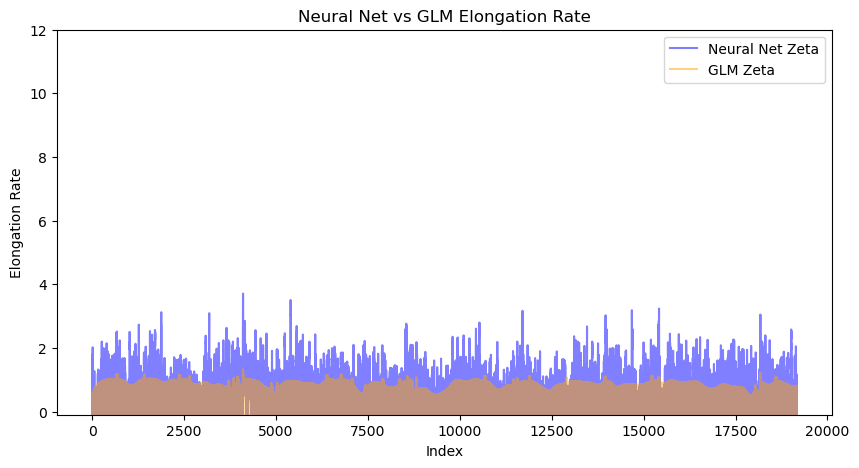

In [27]:
plot_data(cnn_gene_df['Rho_ji'], linear_gene_df['Rho_ji'])

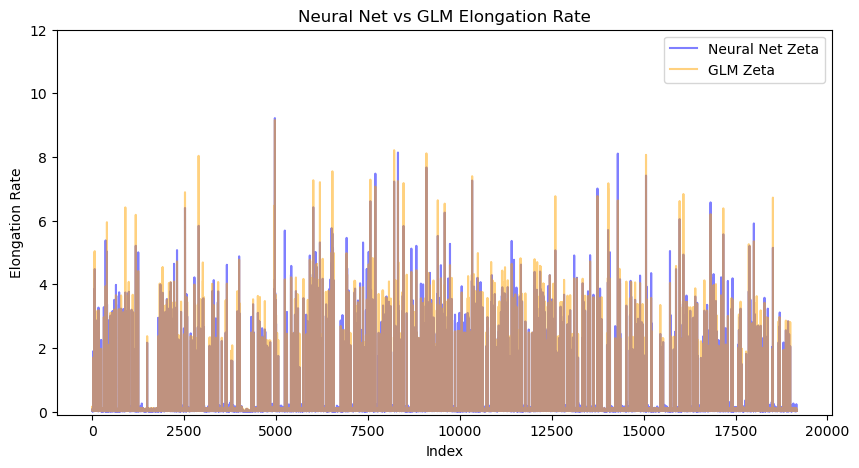

In [28]:
plot_data(cnn_gene_df['Loss_InPlace'], linear_gene_df['Loss_InPlace'])

In [30]:
print(f"CNN Avg Loss: {cnn_gene_df['Loss'].mean()}")
print(f"PyTorch Linear Avg Loss: {linear_gene_df['Loss'].mean()}")

CNN Avg Loss: 0.1557444905988244
PyTorch Linear Avg Loss: 0.1639000769348535


In [31]:
cnn_df['C_j/Zeta'] = cnn_df['C_j'] / cnn_df['Predicted_Zeta']
aggregated_data = cnn_df.groupby('GeneId').agg(
    Sum_X_ji=pd.NamedAgg(column='X_ji', aggfunc='sum'),
    Sum_C_j_Zeta=pd.NamedAgg(column='C_j/Zeta', aggfunc='sum')
).reset_index()
print(aggregated_data)

              GeneId     Sum_X_ji  Sum_C_j_Zeta
0    ENSG00000000419   809.669094    814.305536
1    ENSG00000004864  5348.108809   5043.590979
2    ENSG00000005483  5551.669771   5142.430517
3    ENSG00000006451  1383.061212   1336.567174
4    ENSG00000006530  2149.320650   2064.934013
..               ...          ...           ...
314  ENSG00000221968   452.551455    537.877860
315  ENSG00000247595   301.238970    304.255613
316  ENSG00000273749  1145.048801   1218.574518
317  ENSG00000275066  1587.363006   1537.046203
318  ENSG00000276234  1805.975901   1744.572054

[319 rows x 3 columns]


In [32]:
linear_df['C_j/Zeta'] = linear_df['C_j'] / linear_df['Predicted_Zeta']
linear_aggregated_data = linear_df.groupby('GeneId').agg(
    Sum_X_ji=pd.NamedAgg(column='X_ji', aggfunc='sum'),
    Sum_C_j_Zeta=pd.NamedAgg(column='C_j/Zeta', aggfunc='sum')
).reset_index()
print(linear_aggregated_data)

              GeneId     Sum_X_ji  Sum_C_j_Zeta
0    ENSG00000000419   809.669094    778.720920
1    ENSG00000004864  5348.108809   5120.582987
2    ENSG00000005483  5551.669771   5201.940451
3    ENSG00000006451  1383.061212   1336.114796
4    ENSG00000006530  2149.320650   2046.334916
..               ...          ...           ...
314  ENSG00000221968   452.551455    506.480069
315  ENSG00000247595   301.238970    312.952164
316  ENSG00000273749  1145.048801   1208.597608
317  ENSG00000275066  1587.363006   1558.102385
318  ENSG00000276234  1805.975901   1805.403599

[319 rows x 3 columns]


In [34]:
linear_df['GLM_C_j/Zeta'] = linear_df['C_j'] / linear_df['GLM_Combined_Zeta']
glm_aggregated_data = linear_df.groupby('GeneId').agg(
    Sum_X_ji=pd.NamedAgg(column='X_ji', aggfunc='sum'),
    Sum_C_j_Zeta=pd.NamedAgg(column='GLM_C_j/Zeta', aggfunc='sum')
).reset_index()
print(glm_aggregated_data)

              GeneId     Sum_X_ji  Sum_C_j_Zeta
0    ENSG00000000419   809.669094   1106.074224
1    ENSG00000004864  5348.108809   7256.679022
2    ENSG00000005483  5551.669771   7259.582396
3    ENSG00000006451  1383.061212   1906.597049
4    ENSG00000006530  2149.320650   2912.865059
..               ...          ...           ...
314  ENSG00000221968   452.551455    709.360818
315  ENSG00000247595   301.238970    444.161171
316  ENSG00000273749  1145.048801   1700.624931
317  ENSG00000275066  1587.363006   2197.932702
318  ENSG00000276234  1805.975901   2519.218143

[319 rows x 3 columns]


In [35]:
cnn_df['C_j/Zeta'] = cnn_df['C_j'] / cnn_df['Predicted_Zeta']
cnn_mean_data = cnn_df.groupby('GeneId').agg(
    Mean_X_ji=pd.NamedAgg(column='X_ji', aggfunc='mean'),
    Mean_C_j_Zeta=pd.NamedAgg(column='C_j/Zeta', aggfunc='mean')
).reset_index()
print(cnn_mean_data)

              GeneId  Mean_X_ji  Mean_C_j_Zeta
0    ENSG00000000419   0.042241       0.042483
1    ENSG00000004864   0.027091       0.025549
2    ENSG00000005483   0.057044       0.052839
3    ENSG00000006451   0.017276       0.016696
4    ENSG00000006530   0.021637       0.020787
..               ...        ...            ...
314  ENSG00000221968   0.033386       0.039681
315  ENSG00000247595   0.017765       0.017943
316  ENSG00000273749   0.010512       0.011187
317  ENSG00000275066   0.017625       0.017066
318  ENSG00000276234   0.026557       0.025654

[319 rows x 3 columns]


In [36]:
linear_df['C_j/Zeta'] = linear_df['C_j'] / linear_df['Predicted_Zeta']
linear_mean_data = linear_df.groupby('GeneId').agg(
    Mean_X_ji=pd.NamedAgg(column='X_ji', aggfunc='mean'),
    Mean_C_j_Zeta=pd.NamedAgg(column='C_j/Zeta', aggfunc='mean')
).reset_index()
print(linear_mean_data)

              GeneId  Mean_X_ji  Mean_C_j_Zeta
0    ENSG00000000419   0.042241       0.040626
1    ENSG00000004864   0.027091       0.025939
2    ENSG00000005483   0.057044       0.053450
3    ENSG00000006451   0.017276       0.016690
4    ENSG00000006530   0.021637       0.020600
..               ...        ...            ...
314  ENSG00000221968   0.033386       0.037365
315  ENSG00000247595   0.017765       0.018456
316  ENSG00000273749   0.010512       0.011095
317  ENSG00000275066   0.017625       0.017300
318  ENSG00000276234   0.026557       0.026548

[319 rows x 3 columns]
